# Data Viz: Evaluating the Trajectory dataset

In [1]:
# loading/handling data
import ast  # for parsing the list of coordinates from the text files
import string
import random

# data viz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# machine learning
from typing import Sequence
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_curve, auc

In [2]:
# Mount Google Drive - contains inner.txt and outliers.txt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Function to load trajectories from a text file
def load_trajectories(file_path):
    trajectories = []
    with open(file_path, 'r') as file:
        for line in file:
            trajectory = ast.literal_eval(line.strip())
            trajectories.append(trajectory)
    return trajectories

# Load trajectories from 'inners.txt' and 'outliers.txt'
data_path = '/content/drive/MyDrive/Colab Notebooks/CS7980/trajectory_MiPo/dataset/AiSq10DP/'
inners_trajectories = load_trajectories(data_path+'inners.txt')
outliers_trajectories = load_trajectories(data_path+'outliers.txt')

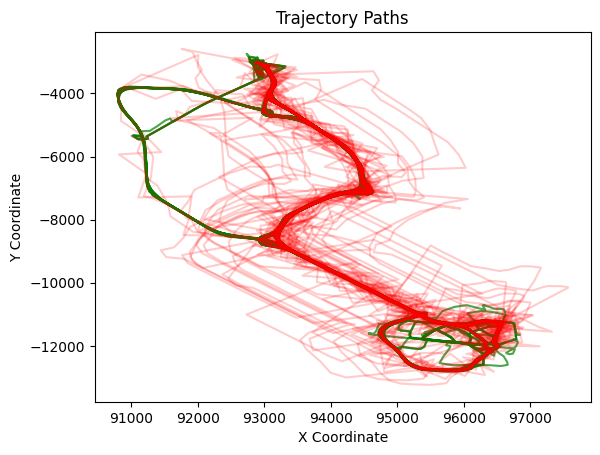

In [4]:
# Visualize map of inners vs. outliers
def plot_trajectories(trajectories, color, alpha):
    for trajectory in trajectories:
        x, y = zip(*trajectory)  # Unzip the trajectory into x and y coordinates
        plt.plot(x, y, color, alpha=alpha)

plt.figure()

# Plot inners trajectories in green with higher alpha for visibility
plot_trajectories(inners_trajectories, 'g', alpha=0.7)

# Plot outers trajectories in red with lower alpha for better differentiation
plot_trajectories(outliers_trajectories, 'r', alpha=0.2)

# Set labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Trajectory Paths')

# Show the plot
plt.show()

# Grid Creation

Develop a data visualization representation for the trajectory dataset beginning to implement iBAT algorithm.
https://www.aimspress.com/article/doi/10.3934/era.2022229?viewType=HTML
https://dl.acm.org/doi/10.1145/2030112.2030127

In [5]:
# Setting m and n - m == n
m = 10
n = m

In [6]:
# Get extreme x,y's of inners
max_xi = float('-inf')
max_yi = float('-inf')
min_xi = float('inf')
min_yi = float('inf')
inner_trajectories = []

for i in inners_trajectories:
    trajectory = []
    for j in i:
        x = float(j[0])
        y = float(j[1])
        trajectory.append((x, y))

        # find min/max values
        max_xi = max(max_xi, x)
        max_yi = max(max_yi, y)
        min_xi = min(min_xi, x)
        min_yi = min(min_yi, y)

    trajectory.append('i')
    inner_trajectories.append(trajectory)

# Printing the results
print(f"Max x: {max_xi}, Max y: {max_yi}")
print(f"Min x: {min_xi}, Min y: {min_yi}")


Max x: 96846.51420460592, Max y: -2747.0755471697253
Min x: 90786.66032646291, Min y: -12810.660661605845


In [7]:
# Get extreme x,y's of outliers (not efficient)
max_xo = float('-inf')
max_yo = float('-inf')
min_xo = float('inf')
min_yo = float('inf')
outlier_trajectories = []

for i in outliers_trajectories:
    trajectory = []
    for j in i:
        x = float(j[0])
        y = float(j[1])
        trajectory.append((x, y))

        # find min/max values
        max_xo = max(max_xo, x)
        max_yo = max(max_yo, y)
        min_xo = min(min_xo, x)
        min_yo = min(min_yo, y)

    trajectory.append('o')
    outlier_trajectories.append(trajectory)

# Printing the results
print(f"Max x: {max_xo}, Max y: {max_yo}")
print(f"Min x: {min_xo}, Min y: {min_yo}")

Max x: 97574.0673913267, Max y: -2590.762230824524
Min x: 90789.45809128726, Min y: -13237.706254377868


In [8]:
# Get extremes
max_x = max(max_xi, max_xo)
max_y = max(max_yi, max_yo)
min_x = min(min_xi, min_xo)
min_y = min(min_yi, min_yo)

# Printing the results
print(f"Max x: {max_x}, Max y: {max_y}")
print(f"Min x: {min_x}, Min y: {min_y}")

Max x: 97574.0673913267, Max y: -2590.762230824524
Min x: 90786.66032646291, Min y: -13237.706254377868


In [9]:
all_trajectories = inner_trajectories + outlier_trajectories

In [10]:
# Function to generate random string of fixed length
def random_string(string_length=3):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(string_length))

In [11]:
# Creating grid ranges
x_range = np.linspace(min_x, max_x, n+1)
y_range = np.linspace(min_y, max_y, m+1)

print(x_range)
print(y_range)

[90786.66032646 91465.40103295 92144.14173944 92822.88244592
 93501.62315241 94180.36385889 94859.10456538 95537.84527187
 96216.58597835 96895.32668484 97574.06739133]
[-13237.70625438 -12173.01185202 -11108.31744967 -10043.62304731
  -8978.92864496  -7914.2342426   -6849.53984025  -5784.84543789
  -4720.15103554  -3655.45663318  -2590.76223082]


In [12]:
# Assigning grid names
grid_names = {}
for i in range(m):
    for j in range(n):
        grid_names[(i, j)] = random_string()
print(grid_names)

assert len(set(grid_names))==(m*n)

{(0, 0): 'qwI', (0, 1): 'duI', (0, 2): 'MIT', (0, 3): 'qXh', (0, 4): 'OkF', (0, 5): 'HIA', (0, 6): 'yoj', (0, 7): 'tbK', (0, 8): 'yri', (0, 9): 'bHE', (1, 0): 'cGl', (1, 1): 'bYM', (1, 2): 'DPm', (1, 3): 'piW', (1, 4): 'Hhi', (1, 5): 'yyK', (1, 6): 'GEK', (1, 7): 'FBM', (1, 8): 'FLZ', (1, 9): 'YQk', (2, 0): 'qBb', (2, 1): 'sMX', (2, 2): 'uqj', (2, 3): 'wrs', (2, 4): 'ini', (2, 5): 'uRI', (2, 6): 'IhU', (2, 7): 'IGI', (2, 8): 'mGV', (2, 9): 'Eig', (3, 0): 'cWz', (3, 1): 'dHd', (3, 2): 'klv', (3, 3): 'OGS', (3, 4): 'Gxc', (3, 5): 'fuX', (3, 6): 'Uiy', (3, 7): 'PAi', (3, 8): 'pev', (3, 9): 'DBo', (4, 0): 'yDb', (4, 1): 'KRi', (4, 2): 'iHD', (4, 3): 'Neg', (4, 4): 'dZQ', (4, 5): 'ltt', (4, 6): 'jXJ', (4, 7): 'ubB', (4, 8): 'Wum', (4, 9): 'dSD', (5, 0): 'rAY', (5, 1): 'LSP', (5, 2): 'QYa', (5, 3): 'vih', (5, 4): 'rGy', (5, 5): 'doK', (5, 6): 'Qme', (5, 7): 'ZBb', (5, 8): 'fJG', (5, 9): 'VMu', (6, 0): 'Jbe', (6, 1): 'MVx', (6, 2): 'Pfx', (6, 3): 'Vqq', (6, 4): 'mjQ', (6, 5): 'XaR', (6, 6): '

In [13]:
# Function to find grid box
def find_grid_box(coordinate):
    x, y = coordinate
    for i in range(m):
        for j in range(n):
            if x_range[j] <= x < x_range[j+1] and y_range[i] <= y < y_range[i+1]:
                #print(f"Coordinate: ({x}, {y})")  # Printing the coordinate
                #print(f"Grid Box: {grid_names[(i, j)]}")  # Printing the grid name
                #print(f"x_range: {x_range[j]} to {x_range[j+1]}")  # Printing x range
                #print(f"y_range: {y_range[i]} to {y_range[i+1]}\n")  # Printing y range
                return grid_names[(i, j)]


In [14]:
# convert coordinate list to sentances
sentances = []
for trajectory in all_trajectories:
    sentance = []
    for coordinate in trajectory:
        if coordinate != 'i' and coordinate != 'o':
            grid_box = find_grid_box(coordinate)
            sentance.append(grid_box)
        else:
            sentance.append(coordinate)
        sentances.append(sentance)

In [15]:
# convert sentances list to spaced sentances
input_sentances = []
for sentance in sentances:
    #print(sentance[0])
    #print(type(sentance[0]))
    result = " ".join(str(item) for item in sentance[:-1]) # dont't include i/o
    input_sentances.append([result, sentance[-1]])

input_sentances[0][0]

'FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FBM FBM FBM IhU IhU IhU uRI fuX Gxc Gxc Gxc Neg Neg Neg Neg rGy rGy rGy doK doK doK XaR XaR xBg wxx wxx FnX FnX FnX nnN nnN nnN'

In [16]:
df = pd.DataFrame(input_sentances, columns =['sentence', 'label'])
df

,sentence,label
0,FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FL...,i
1,FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FL...,i
2,FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FL...,i
3,FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FL...,i
4,FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FL...,i
...,...,...
55820,FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ mGV FLZ FBM FB...,o
55821,FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ mGV FLZ FBM FB...,o
55822,FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ mGV FLZ FBM FB...,o
55823,FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ mGV FLZ FBM FB...,o


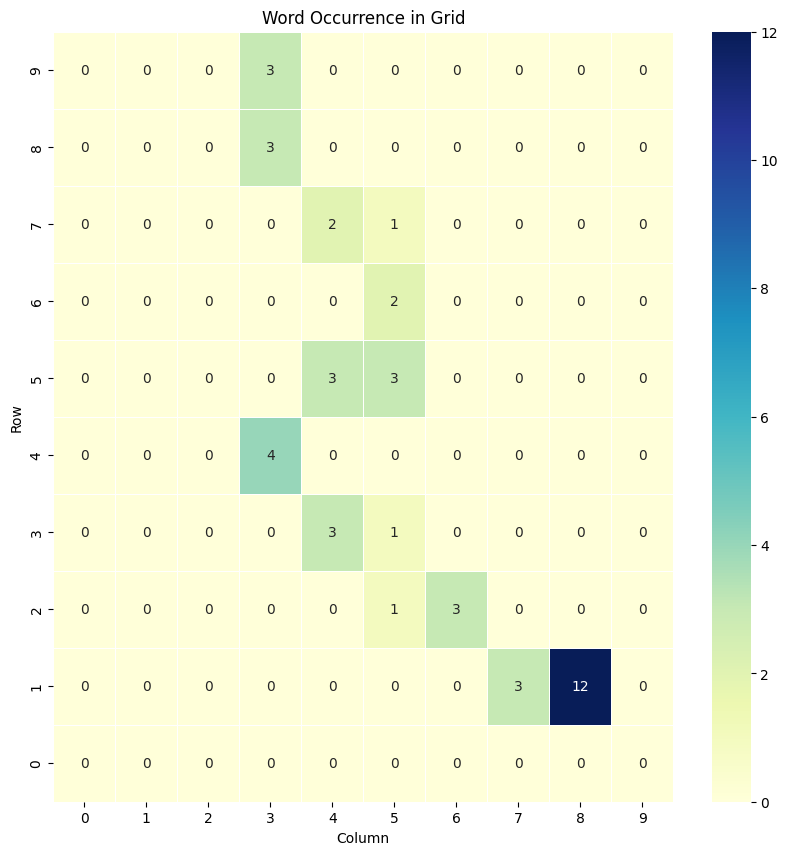

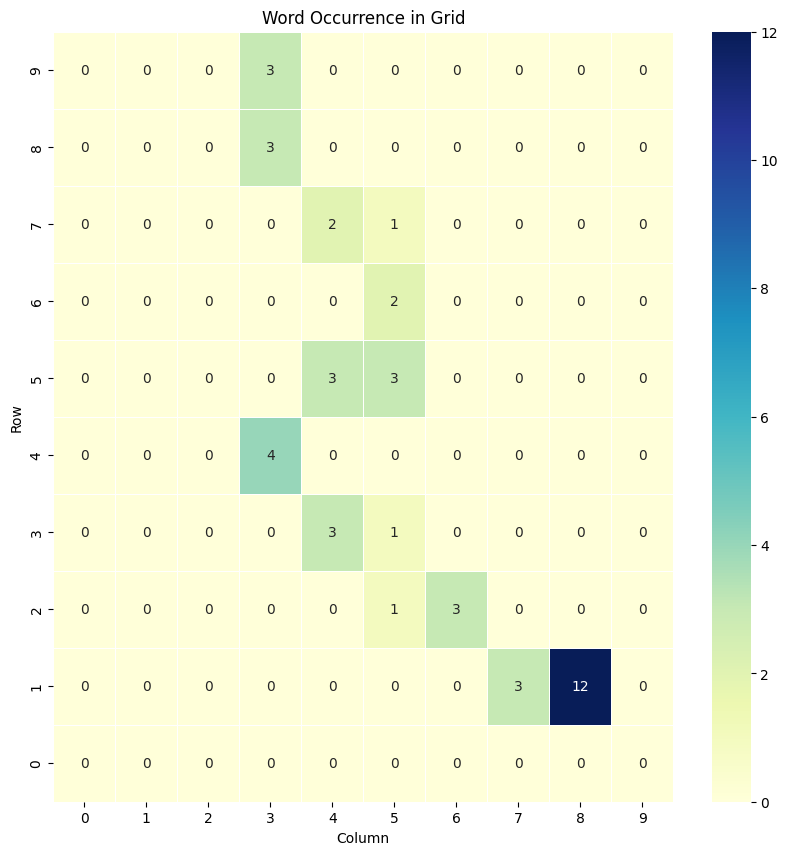

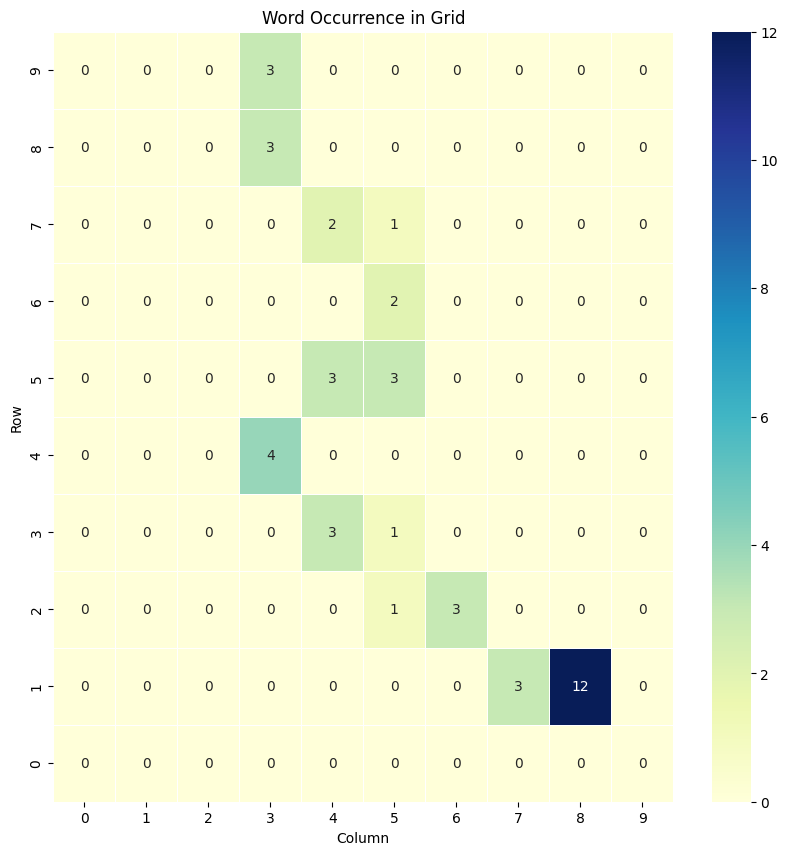

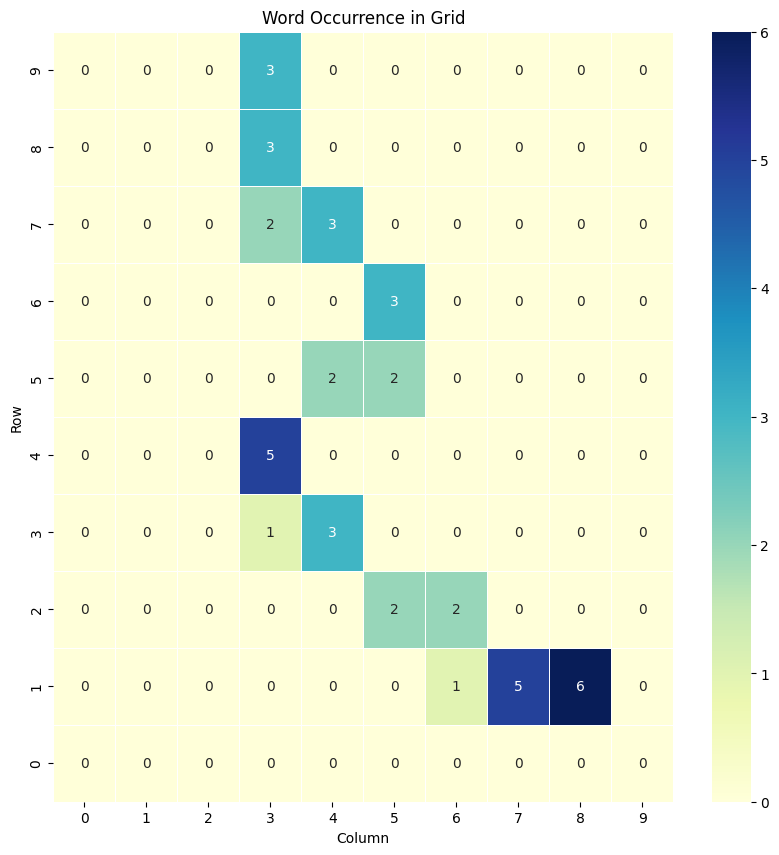

In [17]:
def visualize_grid(sentence):
  # Creating an empty grid
  grid_size = m  # Assuming the grid is mxm
  grid = np.zeros((grid_size, grid_size))

  # Splitting the sentence into words and iterating over each word
  for word in sentence.split():
      # Finding the coordinates of each word in the dictionary
      for coords, grid_word in grid_names.items():
          if word == grid_word:
              grid[coords] += 1  # Incrementing the count in the corresponding cell

  # Creating a heatmap
  plt.figure(figsize=(m, n))
  sns.heatmap(grid, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
  plt.title('Word Occurrence in Grid')
  plt.xlabel('Column')
  plt.ylabel('Row')

  # Inverting the y-axis
  plt.gca().invert_yaxis()

  plt.show()

visualize_grid(input_sentances[0][0])
visualize_grid(input_sentances[1][0])
visualize_grid(input_sentances[5][0])
visualize_grid(input_sentances[3000][0])


# Train LSTM Language Model

In [18]:
sentence_file = data_path+'sentences.txt'
train_file = data_path+'train_sentences.txt'
test_file_only_inners = data_path+'test_sentences.txt'
outlier_sentence_file = data_path+'outlier_sentences.txt'

# Save sentences to a text file, one sentence per line
with open(sentence_file, 'w') as f:
    for sentance in input_sentances:
        if sentance[1] == 'i':
            f.write(sentance[0]+'\n')

# Save outliers into file
with open(outlier_sentence_file, 'w') as f:
    for sentance in input_sentances:
        if sentance[1] == 'o':
            f.write(sentance[0]+'\n')

In [19]:
def split_text_file(input_file_path, train_file_path, val_file_path, split_ratio=0.8):
    with open(input_file_path, 'r') as file:
        lines = file.readlines()

    # Determining the index where to split
    num_lines = len(lines)
    split_idx = int(split_ratio * num_lines)

    # Splitting the lines into two parts
    train_lines = lines[:split_idx]
    val_lines = lines[split_idx:]

    # Writing to the training file
    with open(train_file_path, 'w') as file:
        file.writelines(train_lines)

    # Writing to the validation file
    with open(val_file_path, 'w') as file:
        file.writelines(val_lines)

split_text_file(sentence_file, train_file, test_file_only_inners)

In [20]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        logits = self.fc(lstm_out)
        return logits


# Load and preprocess data
def load_data(file_path):
    with open(file_path, 'r') as file:
        sequences = file.readlines()
    return sequences


# Convert sequences to integer tokens
def tokenize_sequences(sequences, vocab):
    tokenized_sequences = []
    for seq in sequences:
        #print(seq)
        # Splitting the sequence by space to get the tokens
        tokens = seq.strip().split()
        #print(tokens)

        # Converting each token into its corresponding integer in the vocab
        token_ids = [vocab.get(token, -1) for token in tokens]  # returns -1 if the token is not in vocab

        # Filter out any -1 values (tokens not found in vocab)
        token_ids = [tid for tid in token_ids if tid != -1]

        tokenized_sequences.append(token_ids)

    return tokenized_sequences


# Training function
def train_model(model, data, vocab, num_epochs=10, lr=0.01, model_save_path=data_path+'model.pth'):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        model.train()
        random.shuffle(data)  # Shuffle data each epoch
        total_loss = 0  # Keep track of total loss in each epoch
        num_sequences = 0  # Keep track of the number of sequences processed

        for sequence in data:
            if len(sequence) == 0:  # Skip empty sequences
                continue

            optimizer.zero_grad()
            input_seq = torch.tensor(sequence[:-1], dtype=torch.long).unsqueeze(1)
            target_seq = torch.tensor(sequence[1:], dtype=torch.long).unsqueeze(1)

            if input_seq.shape[0] > 0:
                output = model(input_seq)
                loss = criterion(output.squeeze(), target_seq.squeeze())
                loss.backward()
                optimizer.step()

                total_loss += loss.item()
                num_sequences += 1

        avg_loss = total_loss / num_sequences if num_sequences > 0 else 0
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    # Save the model state dictionary
    torch.save(model.state_dict(), model_save_path)
    print(f'Model saved to {model_save_path}')


# Function to calculate perplexity
def calculate_perplexity(model, sequence):
    with torch.no_grad():
        model.eval()
        input_seq = torch.tensor(sequence[:-1]).unsqueeze(1)
        target_seq = torch.tensor(sequence[1:]).unsqueeze(1)
        output = model(input_seq)
        log_probs = nn.functional.log_softmax(output.squeeze(), dim=1)
        total_loss = -torch.mean(torch.gather(log_probs, 1, target_seq))
        perplexity = torch.exp(total_loss)
    return perplexity.item()

In [21]:
# Extracting the unique three-letter combinations and building the vocabulary
unique_tokens = set(grid_names.values())

# Building the vocabulary by assigning an index to each unique token
vocab = {token: idx for idx, token in enumerate(unique_tokens)}

# Build a reverse vocabulary to convert from indices back to tokens
reverse_vocab = {idx: token for token, idx in vocab.items()}

# Printing the vocab to see the mapping
print(vocab)

assert len(set(vocab))==(m*n) # ensure all keys are unique

{'Jbe': 0, 'jXJ': 1, 'MtH': 2, 'KRi': 3, 'cWz': 4, 'ZJD': 5, 'GEK': 6, 'MVx': 7, 'Pfx': 8, 'DPm': 9, 'FnX': 10, 'FLZ': 11, 'uRI': 12, 'OGS': 13, 'VKC': 14, 'xBg': 15, 'USA': 16, 'yDb': 17, 'Jhe': 18, 'wxx': 19, 'tbK': 20, 'cGl': 21, 'pJF': 22, 'mjQ': 23, 'ZBb': 24, 'qwI': 25, 'dZQ': 26, 'doK': 27, 'yRp': 28, 'PTi': 29, 'ubB': 30, 'FBM': 31, 'yyK': 32, 'fJG': 33, 'KlH': 34, 'foS': 35, 'ltt': 36, 'Vqq': 37, 'uVv': 38, 'yri': 39, 'Hhi': 40, 'MIT': 41, 'mGV': 42, 'Neg': 43, 'YQk': 44, 'Ufm': 45, 'qok': 46, 'IGI': 47, 'iph': 48, 'PAi': 49, 'piW': 50, 'Zcs': 51, 'fuX': 52, 'lEW': 53, 'uTL': 54, 'DBo': 55, 'rAY': 56, 'fqq': 57, 'OkF': 58, 'Qme': 59, 'rGy': 60, 'LSP': 61, 'Tnd': 62, 'pev': 63, 'wrs': 64, 'Gxc': 65, 'iHD': 66, 'qBb': 67, 'duI': 68, 'gpR': 69, 'dHd': 70, 'HIA': 71, 'dSD': 72, 'ini': 73, 'yoj': 74, 'nnN': 75, 'nsJ': 76, 'HGk': 77, 'VMu': 78, 'lly': 79, 'mfK': 80, 'bHE': 81, 'uqj': 82, 'Eig': 83, 'vih': 84, 'IhU': 85, 'xKS': 86, 'kzV': 87, 'sMX': 88, 'ZKw': 89, 'Wum': 90, 'qXh': 9

In [22]:
# Load and tokenize data
with open(train_file, 'r') as file:
  sequences = file.readlines()
tokenized_data = tokenize_sequences(sequences, vocab)

print(sequences[0])
print(tokenized_data[0])

FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FLZ FBM FBM FBM IhU IhU IhU uRI fuX Gxc Gxc Gxc Neg Neg Neg Neg rGy rGy rGy doK doK doK XaR XaR xBg wxx wxx FnX FnX FnX nnN nnN nnN

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 31, 31, 31, 85, 85, 85, 12, 52, 65, 65, 65, 43, 43, 43, 43, 60, 60, 60, 27, 27, 27, 94, 94, 15, 19, 19, 10, 10, 10, 75, 75, 75]


**Long Short-Term Memory (LSTM) networks** are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

* The **hidden dimension** is basically the number of nodes in each layer (like
in the Multilayer Perceptron for example)

* The **embedding size** tells you the size of your feature vector (the model uses embedded words as input)

In [23]:
# Initialize and train the model
#model = LSTMModel(len(vocab), embedding_dim=32, hidden_dim=64)
model = LSTMModel(len(vocab), embedding_dim=32, hidden_dim=64)


train_model(model, tokenized_data, vocab, num_epochs=2)

Epoch [1/2], Loss: 0.3513
Epoch [2/2], Loss: 0.3411
Model saved to /content/drive/MyDrive/Colab Notebooks/CS7980/trajectory_MiPo/dataset/AiSq10DP/model.pth


# Testing on labelled data

In [24]:
results = [] #[[perplexity,label]]

In [25]:
# Test Inner Dataset
with open(test_file_only_inners, 'r') as file:
  sequences = file.readlines()

print(sequences[0])
tokenized_test_sequence = tokenize_sequences(sequences, vocab)
print(tokenized_test_sequence[0])

FLZ yri yri yri tbK tbK tbK tbK yoj yoj yoj GEK yyK yyK GEK GEK IhU IhU IhU IhU IhU uRI uRI fuX Gxc Gxc Gxc Gxc Neg Neg Neg Neg vih rGy rGy doK doK doK XaR XaR XaR wxx wxx wxx FnX FnX FnX FnX nnN nnN nnN

[11, 39, 39, 39, 20, 20, 20, 20, 74, 74, 74, 6, 32, 32, 6, 6, 85, 85, 85, 85, 85, 12, 12, 52, 65, 65, 65, 65, 43, 43, 43, 43, 84, 60, 60, 27, 27, 27, 94, 94, 94, 19, 19, 19, 10, 10, 10, 10, 75, 75, 75]


In [26]:
for i in range(len(tokenized_test_sequence)):
  perplexity = calculate_perplexity(model, tokenized_test_sequence[i])
  result = [perplexity, 'i']
  results.append(result)

In [27]:
# Test Outlier Dataset
with open(outlier_sentence_file, 'r') as file:
  sequences = file.readlines()

print(sequences[0])
tokenized_test_sequence = tokenize_sequences(sequences, vocab)
print(tokenized_test_sequence[0])

for i in range(len(tokenized_test_sequence)):
  perplexity = calculate_perplexity(model, tokenized_test_sequence[i])
  result = [perplexity, 'o']
  results.append(result)

FLZ FLZ yri FBM tbK tbK tbK yoj yoj yoj yoj yyK GEK GEK IhU IhU IhU IhU uRI fuX Gxc Gxc OGS Neg Neg Neg Neg rGy rGy XaR doK XaR XaR XaR xBg wxx wxx FnX FnX FnX FnX nnN nnN

[11, 11, 39, 31, 20, 20, 20, 74, 74, 74, 74, 32, 6, 6, 85, 85, 85, 85, 12, 52, 65, 65, 13, 43, 43, 43, 43, 60, 60, 94, 27, 94, 94, 94, 15, 19, 19, 10, 10, 10, 10, 75, 75]


# Analysis

In [28]:
# creating df object with columns specified
df = pd.DataFrame(results, columns =['perplexity', 'label'])
print(df)

       perplexity label
0        1.320797     i
1        1.320797     i
2        1.320797     i
3        1.320797     i
4        1.320797     i
...           ...   ...
15944    2.499149     o
15945    2.499149     o
15946    2.499149     o
15947    2.499149     o
15948    2.499149     o

[15949 rows x 2 columns]


## Applying logarithmic transform
In our analysis, we applied the logarithmic transformation to the perplexity scores and then normalized the data such that:

* Values corresponding to the label 'i' are closer to 0.
* Values corresponding to the label 'o' are closer to 1.

This makes it easier to set a threshold for classification and visualization.

In [29]:
# Applying Log Transformation with base 10
df['log_transformed_perplexity'] = np.log1p(df['perplexity'])

# Normalizing the log-transformed values
max_value = df['log_transformed_perplexity'].max()
min_value = df['log_transformed_perplexity'].min()

# Normalize the log perplexity score {0,1}
df['normalized_log_perplexity'] = (df['log_transformed_perplexity'] - min_value) / (max_value - min_value)

df

,perplexity,label,log_transformed_perplexity,normalized_log_perplexity
0,1.320797,i,0.841911,0.004642
1,1.320797,i,0.841911,0.004642
2,1.320797,i,0.841911,0.004642
3,1.320797,i,0.841911,0.004642
4,1.320797,i,0.841911,0.004642
...,...,...,...,...
15944,2.499149,o,1.252520,0.036048
15945,2.499149,o,1.252520,0.036048
15946,2.499149,o,1.252520,0.036048
15947,2.499149,o,1.252520,0.036048


In [30]:
# Separate the data into two DataFrames based on the label
df_i = df[df['label'] == 'i']
df_o = df[df['label'] == 'o']

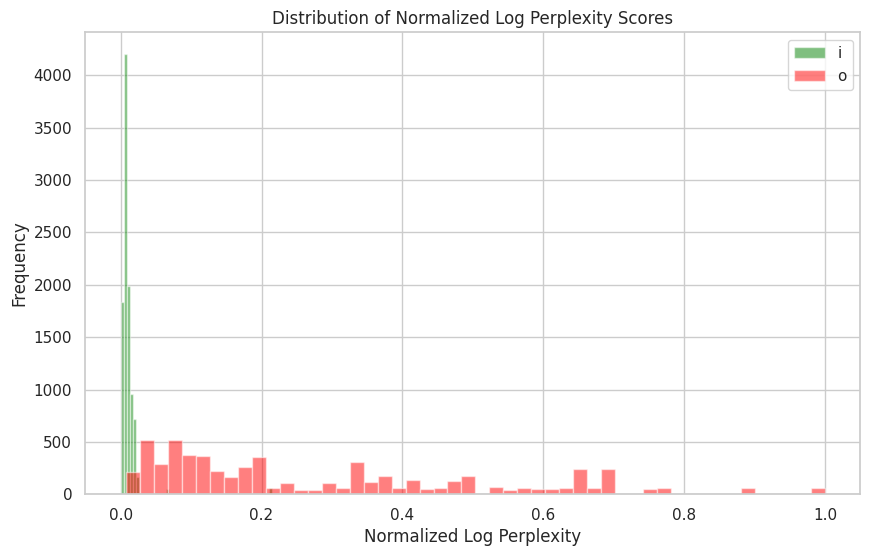

In [31]:
# Setting up the aesthetic features for the plots
sns.set(style="whitegrid")

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_i['normalized_log_perplexity'], bins=50, color='green', alpha=0.5, label='i')
plt.hist(df_o['normalized_log_perplexity'], bins=50, color='red', alpha=0.5, label='o')
plt.xlabel('Normalized Log Perplexity')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Log Perplexity Scores')
plt.legend()
plt.show()

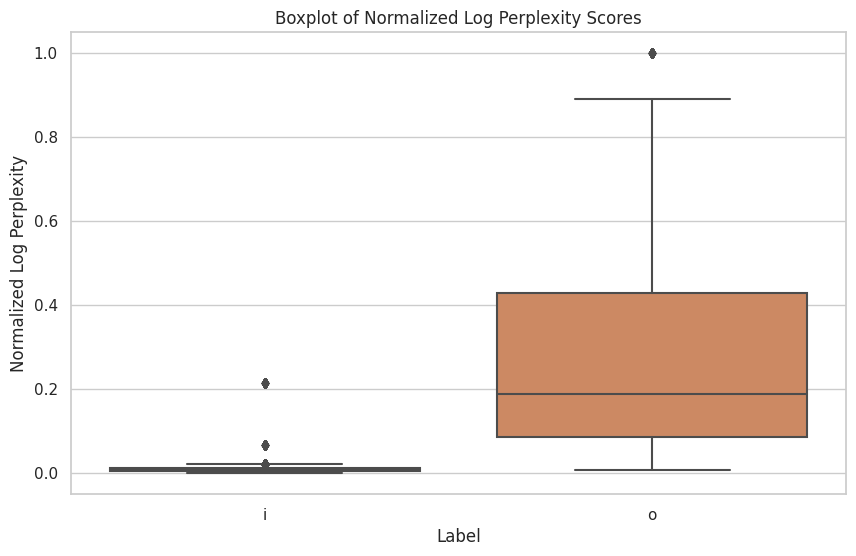

In [32]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='normalized_log_perplexity', data=df)
plt.xlabel('Label')
plt.ylabel('Normalized Log Perplexity')
plt.title('Boxplot of Normalized Log Perplexity Scores')
plt.show()

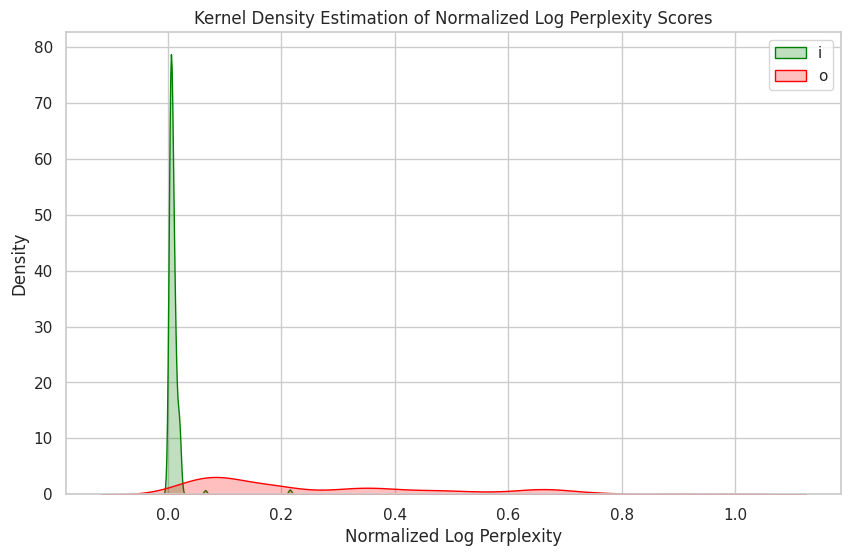

In [33]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_i['normalized_log_perplexity'], fill=True, color='green', label='i')
sns.kdeplot(df_o['normalized_log_perplexity'], fill=True, color='red', label='o')
plt.xlabel('Normalized Log Perplexity')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Normalized Log Perplexity Scores')
plt.legend()
plt.show()

In [34]:
df_i.describe()

,perplexity,log_transformed_perplexity,normalized_log_perplexity
count,9970.000000,9970.000000,9970.000000
mean,1.655106,0.911818,0.009989
std,2.573854,0.220772,0.016886
min,1.184140,0.781222,0.000000
25%,1.327425,0.844763,0.004860
50%,1.402390,0.876464,0.007285
75%,1.535746,0.930488,0.011417
max,35.427055,3.595312,0.215239


In [35]:
df_o.describe()

,perplexity,log_transformed_perplexity,normalized_log_perplexity
count,5.979000e+03,5979.000000,5979.000000
mean,1.507706e+04,4.438489,0.279730
std,1.032841e+05,3.076250,0.235291
min,1.404694e+00,0.877423,0.007358
25%,5.789200e+00,1.915333,0.086744
50%,2.470633e+01,3.246737,0.188578
75%,5.872651e+02,6.377178,0.428013
max,1.040775e+06,13.855477,1.000000


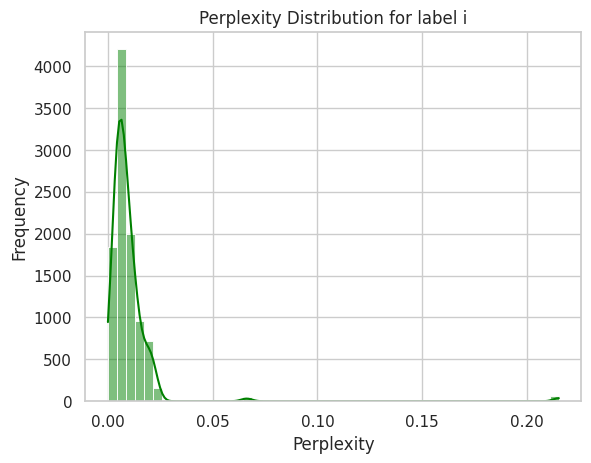

In [36]:
sns.histplot(df_i['normalized_log_perplexity'], bins=50, kde=True, color='green')
plt.title('Perplexity Distribution for label i')
plt.xlabel('Perplexity')
plt.ylabel('Frequency')
plt.show()

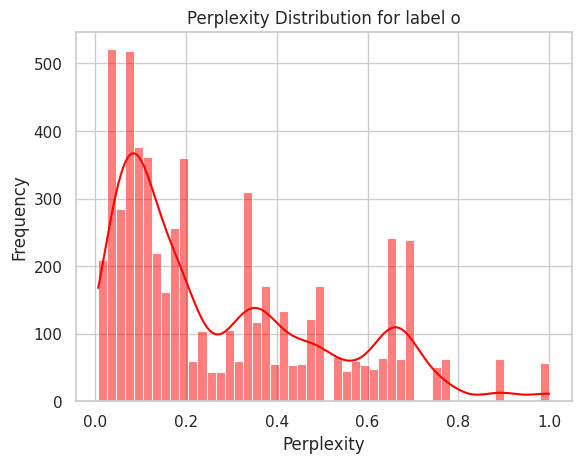

In [37]:
sns.histplot(df_o['normalized_log_perplexity'], bins=50, kde=True, color='red')
plt.title('Perplexity Distribution for label o')
plt.xlabel('Perplexity')
plt.ylabel('Frequency')
plt.show()

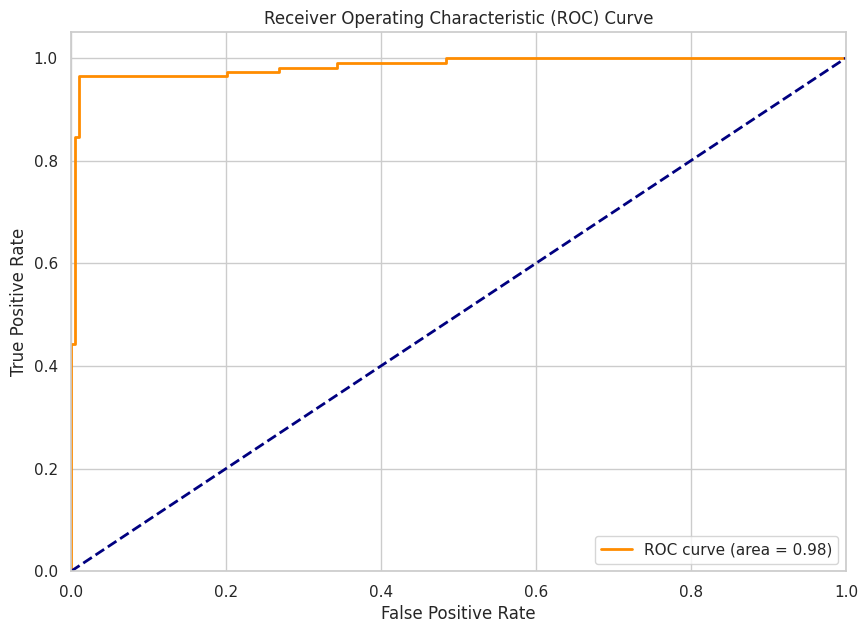

Optimal threshold is 0.0280152996192709


In [38]:
"""
We use an AUROC curve to find the point that gives the best balance between
True Positive Rate (TPR) and False Positive Rate (FPR), this point gives
us our optimal threshold.
"""
df['label_binary'] = df['label'].apply(lambda x: 0 if x == 'i' else 1)

fpr, tpr, thresholds = roc_curve(df['label_binary'], df['normalized_log_perplexity'])

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Getting the threshold for which the difference between TPR and FPR is maximum
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold is {optimal_threshold}")


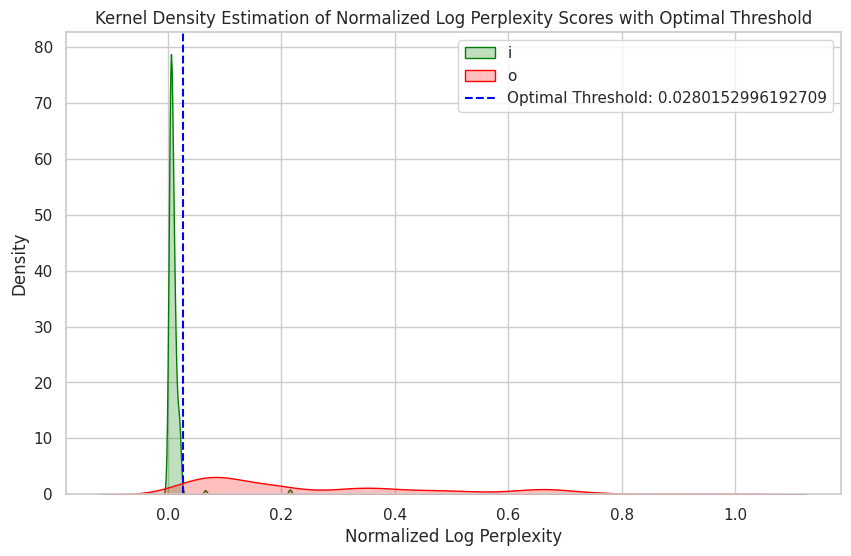

In [39]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_i['normalized_log_perplexity'], fill=True, color='green', label='i')
sns.kdeplot(df_o['normalized_log_perplexity'], fill=True, color='red', label='o')

# Adding a vertical line for the optimal_threshold
plt.axvline(x=optimal_threshold, color='blue', linestyle='--', label=f'Optimal Threshold: {optimal_threshold}')

plt.xlabel('Normalized Log Perplexity')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Normalized Log Perplexity Scores with Optimal Threshold')
plt.legend()
plt.show()

In [40]:
df

,perplexity,label,log_transformed_perplexity,normalized_log_perplexity,label_binary
0,1.320797,i,0.841911,0.004642,0
1,1.320797,i,0.841911,0.004642,0
2,1.320797,i,0.841911,0.004642,0
3,1.320797,i,0.841911,0.004642,0
4,1.320797,i,0.841911,0.004642,0
...,...,...,...,...,...
15944,2.499149,o,1.252520,0.036048,1
15945,2.499149,o,1.252520,0.036048,1
15946,2.499149,o,1.252520,0.036048,1
15947,2.499149,o,1.252520,0.036048,1


In [41]:
# Function to classify instances based on threshold
def classify(row, threshold):
    return 'o' if row['normalized_log_perplexity'] > threshold else 'i'

# Applying the classification function to the DataFrame
df['predicted_label'] = df.apply(lambda row: classify(row, optimal_threshold), axis=1)
df

,perplexity,label,log_transformed_perplexity,normalized_log_perplexity,label_binary,predicted_label
0,1.320797,i,0.841911,0.004642,0,i
1,1.320797,i,0.841911,0.004642,0,i
2,1.320797,i,0.841911,0.004642,0,i
3,1.320797,i,0.841911,0.004642,0,i
4,1.320797,i,0.841911,0.004642,0,i
...,...,...,...,...,...,...
15944,2.499149,o,1.252520,0.036048,1,o
15945,2.499149,o,1.252520,0.036048,1,o
15946,2.499149,o,1.252520,0.036048,1,o
15947,2.499149,o,1.252520,0.036048,1,o


In [42]:
df.describe()

,perplexity,log_transformed_perplexity,normalized_log_perplexity,label_binary
count,1.594900e+04,15949.000000,15949.000000,15949.000000
mean,5.653159e+03,2.233905,0.111110,0.374882
std,6.365490e+04,2.548050,0.194891,0.484108
min,1.184140e+00,0.781222,0.000000,0.000000
25%,1.364542e+00,0.860584,0.006070,0.000000
50%,1.565306e+00,0.942078,0.012303,0.000000
75%,8.575333e+00,2.259190,0.113044,1.000000
max,1.040775e+06,13.855477,1.000000,1.000000


In [43]:
df.to_csv(data_path+'perplexity_results.csv', index=False)

In [44]:
# Creating a confusion matrix
confusion_matrix = pd.crosstab(df['label'], df['predicted_label'], rownames=['Actual'], colnames=['Predicted'], margins=True)

# Display the raw counts
print("Raw counts:")
print(confusion_matrix)
print()

# Creating a normalized confusion matrix
confusion_matrix_percent = confusion_matrix.copy()

for col in ['i', 'o', 'All']:
    confusion_matrix_percent[col] /= confusion_matrix_percent['All']

for row in ['i', 'o', 'All']:
    confusion_matrix_percent.loc[row] /= confusion_matrix_percent.loc[row, 'All']

# Display the percentages
print("Percentages:")
print(confusion_matrix_percent * 100)  # Multiply by 100 to convert proportions to percentages

# Calculating accuracy
accuracy = (df['label'] == df['predicted_label']).mean()

print(f"\nAccuracy: {accuracy * 100:.2f}%")


Raw counts:
Predicted      i     o    All
Actual                       
i           9864   106   9970
o            262  5717   5979
All        10126  5823  15949

Percentages:
Predicted          i          o    All
Actual                                
i          98.936810   1.063190  100.0
o           4.382004  95.617996  100.0
All        63.489874  36.510126  100.0

Accuracy: 97.69%
